## There is no denying that the climate is changing and, with the changing climate natural disasters become worse and cause more damage.  Climate change is directly correlated to environmental security, regional stability, maritime security, humanitarian issues, and overall global security.  Droughts, floods, hurricanes damage infrastructure, interrupt the supply chain, add to food instability, and adding to the deterioration of the natural habitats of thousands of species. This is storm data from NOAA. The first file is data from 2006 and will be used as my baseline for this analysis.  This analysis, spread over the course of five years, is meant to highlight the climate crisis and offer my perspective on consequences, new patterns, and possible solutions.  While I may not be an expert on climate or anything relating to the weather, I do understand the damage that can be caused if climate change is not taken as a serious threat.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('StormEvents_details-database_v1.0_d2021_c20210607.csv')
df.head(1)

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_TITLE,EPISODE_NARRATIVE,EVENT_NARRATIVE,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE,DATA_SOURCE
0,202102,14,1624,202102,14,1624,155009,934786,FLORIDA,12,2021,February,Flood,C,35,FLAGLER,JAX,14-FEB-21 16:24:00,EST-5,14-FEB-21 16:24:00,0,0,0,0,0.00K,0.00K,Fire Department/Rescue,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,SSW,ESPANOLA,4.0,SSW,ESPANOLA,29.46,-81.33,29.4596,-81.3317,Brief Tornado Touchdown St. Johns County - FL ...,"A wet, unsettled weather pattern continued ove...",Up to a half of a foot of standing water was r...,99999999,9999,20210302,1001,NaN,03/02/2021 10:01:22,NaN,NaN,CSV


# The first thing I notice right away is the most common start date is about a month earlier in 2018 than 2006 and the same with the end date.  

In [2]:
df['BEGIN_DATE_TIME'].describe()

count                  10709
unique                  2816
top       01-FEB-21 00:00:00
freq                     413
Name: BEGIN_DATE_TIME, dtype: object

In [3]:
begin_dates = df[df['BEGIN_DATE_TIME'] == '01-FEB-21 00:00:00']

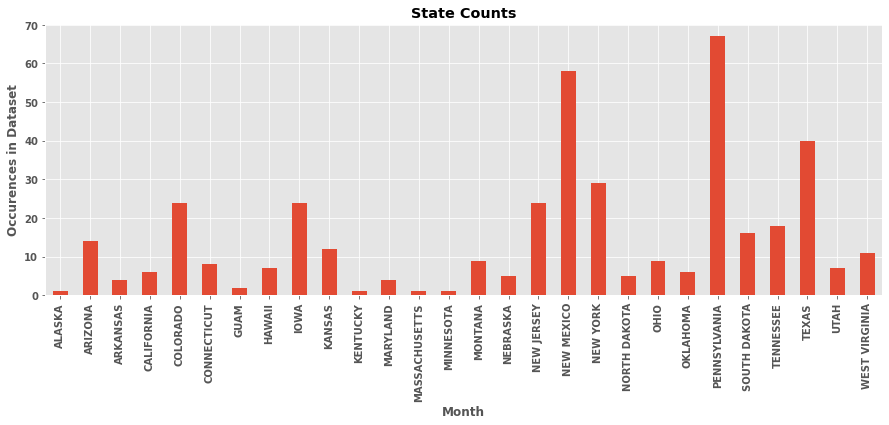

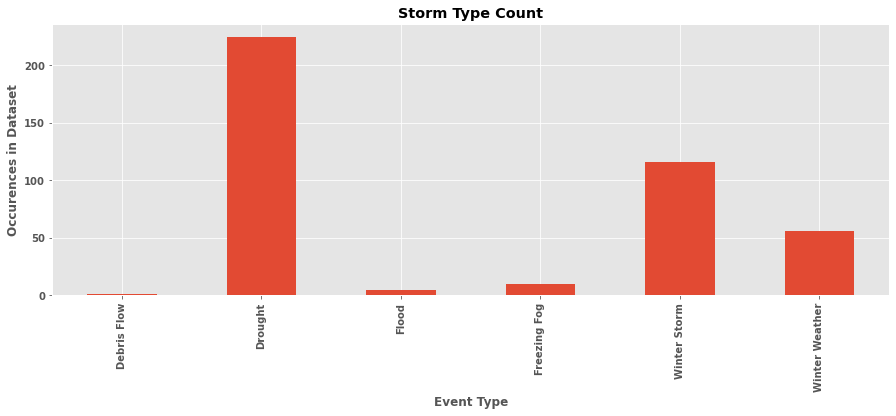

In [4]:
plt.figure(figsize=(15,5))
begin_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
begin_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [5]:
df['END_DATE_TIME'].describe()

count                  10709
unique                  2649
top       31-JAN-21 23:59:00
freq                     447
Name: END_DATE_TIME, dtype: object

In [6]:
end_dates = df[df['END_DATE_TIME'] == '31-JAN-21 23:59:00']

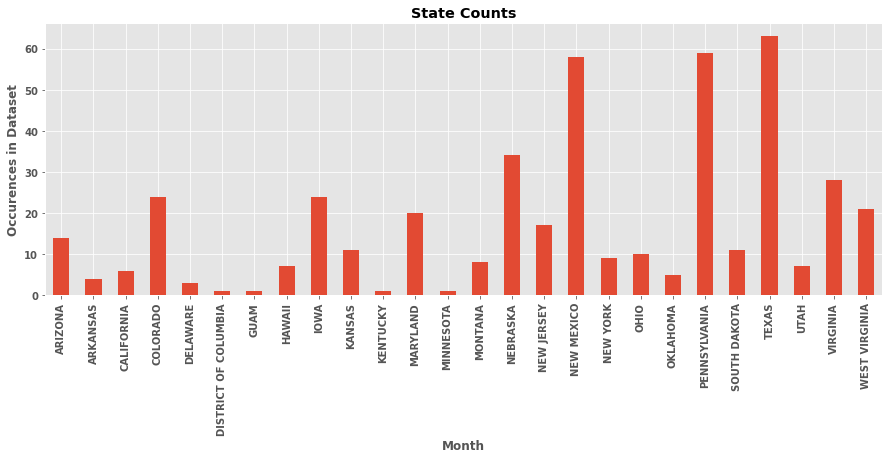

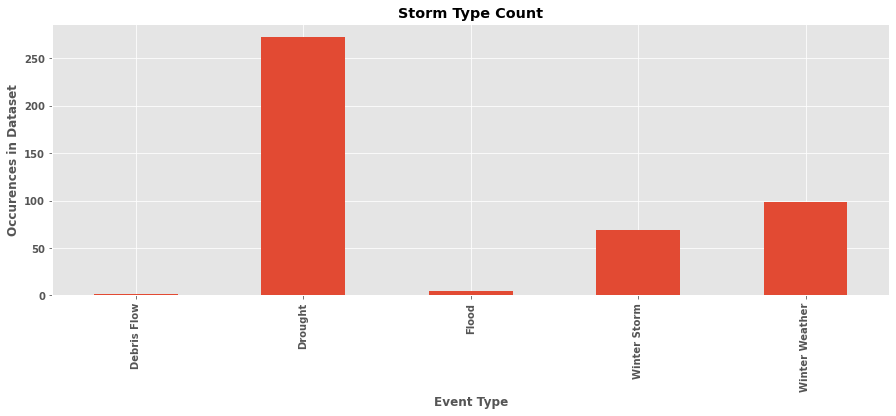

In [7]:
plt.figure(figsize=(15,5))
end_dates.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
end_dates.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [8]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,10709.000000,10709.000000,10709.000000,10709.000000,10709.000000,10709.000000,10709.000000,10709.000000,10709.000000,10709.0,10709.000000,10709.000000,10709.000000,10709.000000,10709.000000,1408.000000,0.0,28.000000,28.000000,1.0,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,1.070900e+04,10709.000000,1.070900e+04,10709.000000,378.000000,378.0
mean,202101.609674,14.517415,1009.059763,202101.609674,16.695770,1266.953871,155502.553927,938697.636287,31.858810,2021.0,95.782706,0.015968,0.004762,0.012606,0.005229,50.836520,NaN,3.103929,137.892857,231.0,2.063554,2.081712,34.254526,-97.567889,34.237845,-97.557770,4.223464e+07,3805.265478,2.021040e+07,1364.684938,1.600529,20210519.0
std,0.487846,8.462921,776.947831,0.487846,8.336413,632.589330,693.698630,5005.752646,16.334311,0.0,131.923184,1.024279,0.136925,0.363555,0.103950,15.942114,NaN,5.585077,189.124560,NaN,2.650627,2.655025,5.221446,21.305825,5.260926,21.292422,3.567016e+07,3850.074868,6.111255e+01,384.602975,0.490439,0.0
min,202101.000000,1.000000,0.000000,202101.000000,1.000000,0.000000,153940.000000,927122.000000,1.000000,2021.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,NaN,0.010000,3.000000,231.0,0.000000,0.000000,19.129000,-159.652900,19.034300,-159.485800,2.021010e+07,11.000000,2.021020e+07,7.000000,1.000000,20210519.0
25%,202101.000000,10.000000,300.000000,202101.000000,12.000000,811.000000,154898.000000,934907.000000,19.000000,2021.0,20.000000,0.000000,0.000000,0.000000,0.000000,43.000000,NaN,0.762500,50.000000,231.0,1.000000,1.000000,30.863250,-112.382950,30.865500,-112.382950,2.021032e+07,1217.000000,2.021033e+07,1057.000000,1.000000,20210519.0
50%,202102.000000,14.000000,912.000000,202102.000000,16.000000,1200.000000,155481.000000,938823.000000,31.000000,2021.0,53.000000,0.000000,0.000000,0.000000,0.000000,52.000000,NaN,1.275000,75.000000,231.0,1.000000,1.000000,36.111700,-86.940000,36.095500,-86.930600,2.021042e+07,1702.000000,2.021043e+07,1310.000000,2.000000,20210519.0
75%,202102.000000,19.000000,1800.000000,202102.000000,24.000000,1800.000000,156146.000000,943139.000000,47.000000,2021.0,97.000000,0.000000,0.000000,0.000000,0.000000,59.250000,NaN,2.172500,150.000000,231.0,2.000000,2.000000,37.324200,-83.340050,37.324150,-83.334800,1.000000e+08,9999.000000,2.021043e+07,1620.000000,2.000000,20210519.0
max,202102.000000,31.000000,2358.000000,202102.000000,31.000000,2359.000000,156681.000000,946925.000000,98.000000,2021.0,853.000000,101.000000,8.000000,34.000000,6.000000,119.000000,NaN,21.900000,900.000000,231.0,42.000000,41.000000,47.651700,-70.140000,47.651500,-70.140000,1.000000e+08,9999.000000,2.021051e+07,2350.000000,2.000000,20210519.0


In [9]:
begin_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,413.0,413.0,413.0,413.0,413.000000,413.000000,413.000000,413.000000,413.000000,413.0,413.00000,413.0,413.0,413.000000,413.0,0.0,0.0,0.0,0.0,0.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.130000e+02,413.000000,4.130000e+02,413.000000,0.0,0.0
mean,202102.0,1.0,0.0,202102.0,15.845036,1631.089588,155652.406780,940743.196126,33.639225,2021.0,109.25908,0.0,0.0,0.002421,0.0,NaN,NaN,NaN,NaN,NaN,1.833333,2.833333,36.505017,-96.126317,36.475917,-96.123217,5.034885e+07,4612.518160,2.021043e+07,1457.092010,NaN,NaN
std,0.0,0.0,0.0,0.0,12.583130,809.127514,622.890825,3727.694456,14.478411,0.0,141.49875,0.0,0.0,0.049207,0.0,NaN,NaN,NaN,NaN,NaN,2.316607,4.167333,2.856591,13.520499,2.890053,13.519493,3.873035e+07,4219.120486,2.026491e+01,285.833598,NaN,NaN
min,202102.0,1.0,0.0,202102.0,1.000000,0.000000,154598.000000,931487.000000,2.000000,2021.0,1.00000,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,33.357200,-123.447300,33.249000,-123.446400,2.021021e+07,319.000000,2.021031e+07,1057.000000,NaN,NaN
25%,202102.0,1.0,0.0,202102.0,2.000000,800.000000,155293.000000,936813.000000,24.000000,2021.0,18.00000,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,0.250000,0.250000,35.283275,-92.281450,35.251075,-92.224500,2.021042e+07,1122.000000,2.021042e+07,1254.000000,NaN,NaN
50%,202102.0,1.0,0.0,202102.0,23.000000,2359.000000,155735.000000,941047.000000,36.000000,2021.0,46.00000,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,1.000000,1.500000,35.702050,-91.333750,35.662400,-91.338750,2.021043e+07,1811.000000,2.021043e+07,1348.000000,NaN,NaN
75%,202102.0,1.0,0.0,202102.0,28.000000,2359.000000,156185.000000,943888.000000,42.000000,2021.0,147.00000,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,2.500000,2.750000,36.980400,-91.132750,37.002150,-91.166625,1.000000e+08,9999.000000,2.021043e+07,1635.000000,NaN,NaN
max,202102.0,1.0,0.0,202102.0,28.000000,2359.000000,156643.000000,946688.000000,98.000000,2021.0,515.00000,0.0,0.0,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,6.000000,11.000000,41.718600,-86.980000,41.719000,-86.986400,1.000000e+08,9999.000000,2.021050e+07,2214.000000,NaN,NaN


In [10]:
end_dates.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,ADDCORR_FLG,ADDCORR_DATE
count,447.0,447.000000,447.000000,447.0,447.0,447.0,447.000000,447.000000,447.000000,447.0,447.000000,447.0,447.0,447.0,447.0,0.0,0.0,0.0,0.0,0.0,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,4.470000e+02,447.000000,4.470000e+02,447.000000,30.0,30.0
mean,202101.0,12.912752,234.514541,202101.0,31.0,2359.0,155170.118568,935850.850112,34.633110,2021.0,133.096197,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.666667,2.00000,36.499850,-96.111517,36.485333,-96.124717,4.787786e+07,4285.536913,2.021033e+07,1428.803132,1.0,20210519.0
std,0.0,14.545706,469.009890,0.0,0.0,0.0,537.749968,3769.818966,14.370173,0.0,158.529572,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.966384,2.19089,2.860337,13.525550,2.867184,13.519301,3.801745e+07,4181.390290,3.886344e+01,465.198893,0.0,0.0
min,202101.0,1.000000,0.000000,202101.0,31.0,2359.0,154292.000000,930736.000000,4.000000,2021.0,1.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,33.330900,-123.447800,33.328600,-123.446100,2.021020e+07,152.000000,2.021022e+07,648.000000,1.0,20210519.0
25%,202101.0,1.000000,0.000000,202101.0,31.0,2359.0,154620.000000,931803.500000,24.000000,2021.0,22.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.250000,1.00000,35.282100,-92.218200,35.255100,-92.243700,2.021031e+07,1214.500000,2.021033e+07,1051.500000,1.0,20210519.0
50%,202101.0,1.000000,0.000000,202101.0,31.0,2359.0,155196.000000,935830.000000,35.000000,2021.0,56.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,35.703800,-91.331950,35.675150,-91.336650,2.021033e+07,1634.000000,2.021033e+07,1315.000000,1.0,20210519.0
75%,202101.0,31.000000,300.000000,202101.0,31.0,2359.0,155642.000000,939358.500000,48.000000,2021.0,210.500000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.500000,2.50000,36.980425,-91.130825,36.970450,-91.157475,1.000000e+08,9999.000000,2.021033e+07,1705.000000,1.0,20210519.0
max,202101.0,31.000000,2303.000000,202101.0,31.0,2359.0,156203.000000,942517.000000,98.000000,2021.0,515.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.000000,6.00000,41.713100,-86.980000,41.715800,-86.985100,1.000000e+08,9999.000000,2.021042e+07,2350.000000,1.0,20210519.0


## Analysis of whole dataframe

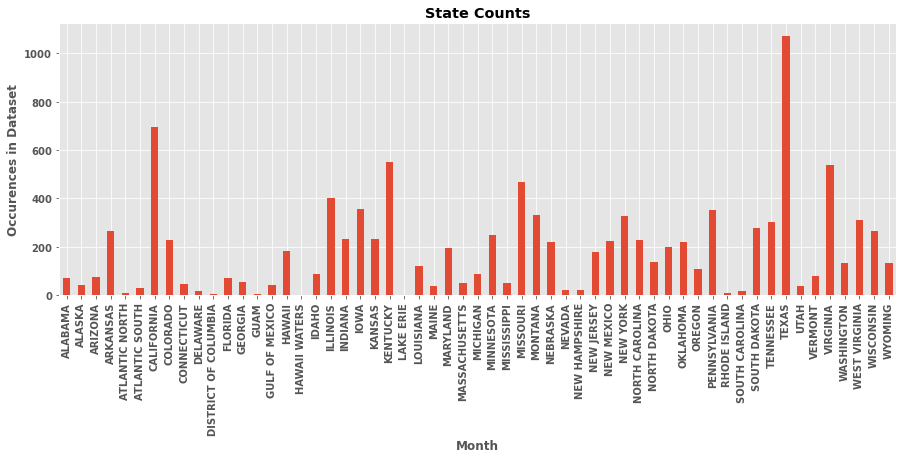

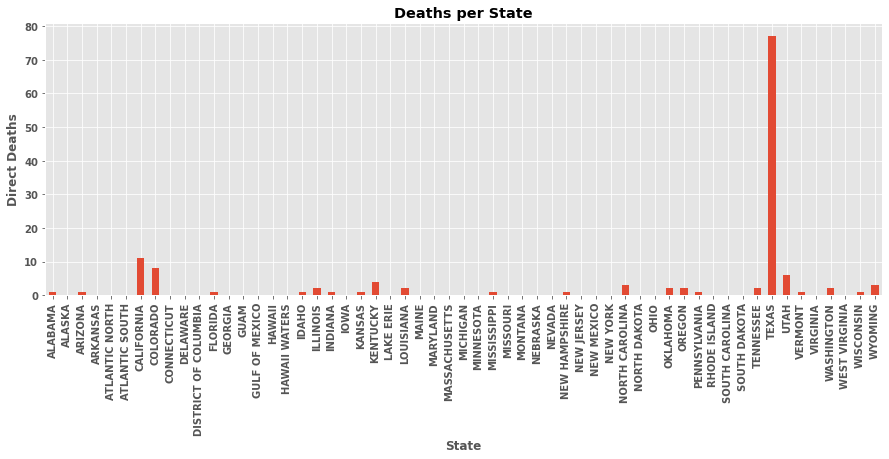

In [11]:
plt.figure(figsize=(15,5))
df.groupby('STATE')['STATE'].count().plot(kind='bar')
plt.title('State Counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('STATE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per State', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

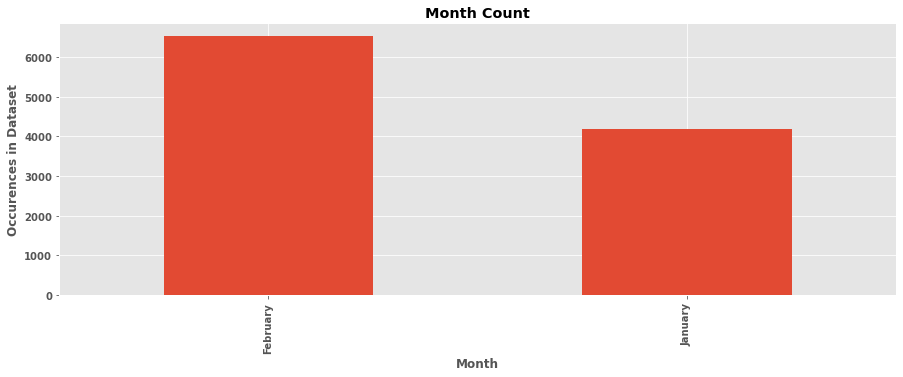

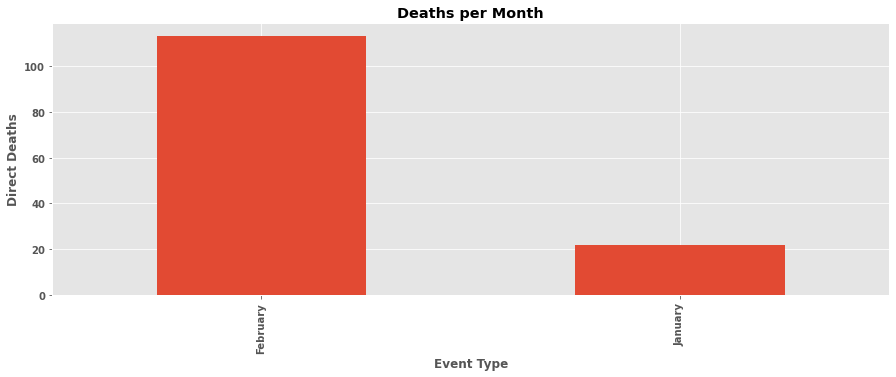

In [12]:
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['MONTH_NAME'].count().plot(kind='bar')
plt.title('Month Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('MONTH_NAME')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Month', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## Excessive heat doesn't even show up in the plot for 2006 and there is over 100 more deaths caused by wildfires in 2018 than 2006.

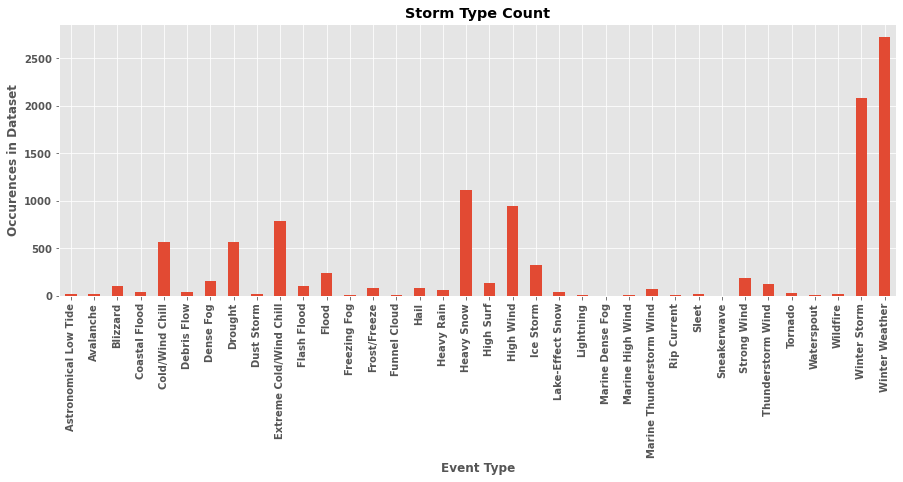

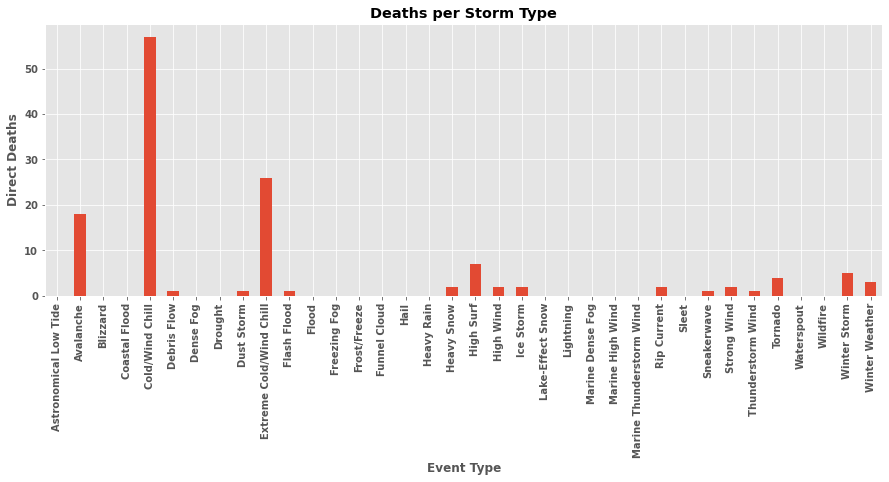

In [13]:
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Storm Type Count', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(15,5))
df.groupby('EVENT_TYPE')['DEATHS_DIRECT'].sum().plot(kind='bar')
plt.title('Deaths per Storm Type', fontweight='bold')
plt.ylabel('Direct Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Event Type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## The range of storms seems to cluster around 10-15 miles and has an extreme of about 160 miles. The cluster is grouped tighter than in 2006 but there are less outliers in 2018 than in 2006.

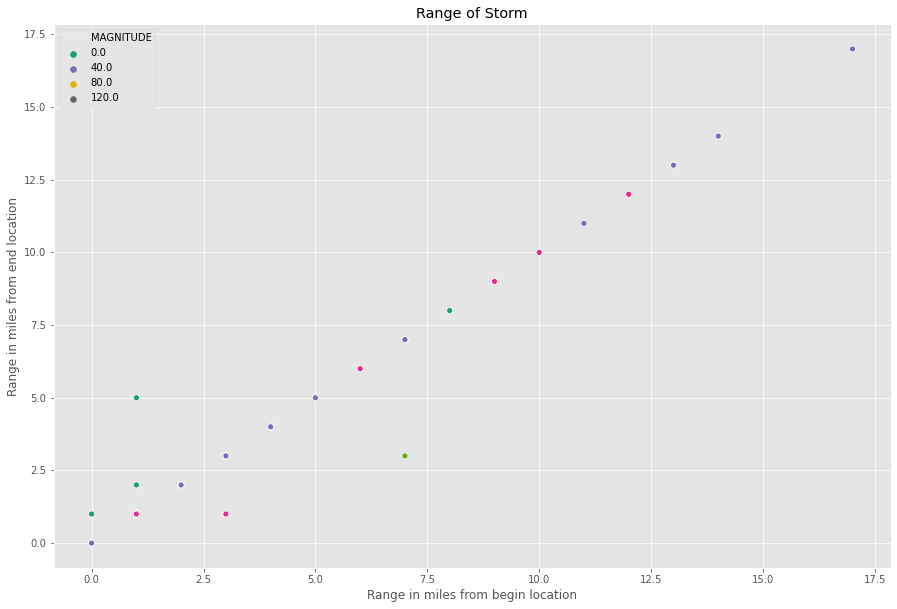

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot('BEGIN_RANGE', 'END_RANGE', hue='MAGNITUDE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Range in miles from end location')
plt.xlabel('Range in miles from begin location')
plt.show()

# EF0 – Light Damage (40 – 72 mph)
# EF1 – Moderate Damage (73 – 112 mph)
# EF2 – Significant damage (113 – 157 mph)
# EF3 – Severe Damage (158 – 206 mph)
# EF4 – Devastating Damage (207 – 260 mph)
# EF5 – Incredible Damage (261 – 318 mph)

## There's more varition in the size of a tornado in 2018 than 2006 and more tornados seem to have a higher intensity.

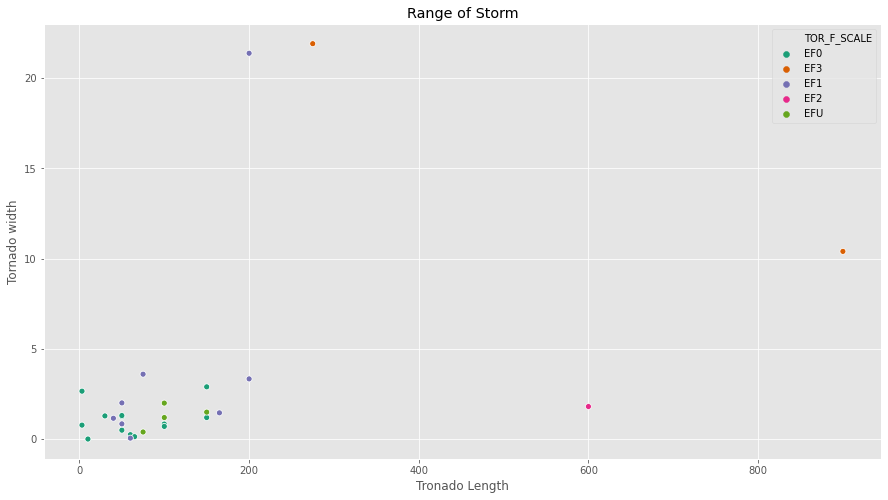

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot('TOR_WIDTH', 'TOR_LENGTH', hue='TOR_F_SCALE', data=df, palette='Dark2')
plt.title('Range of Storm')
plt.ylabel('Tornado width')
plt.xlabel('Tronado Length')
plt.show()

# EG = Wind Estimated Gust; ES = Estimated Sustained Wind; MS = Measured Sustained Wind;
# MG = Measured Wind Gust

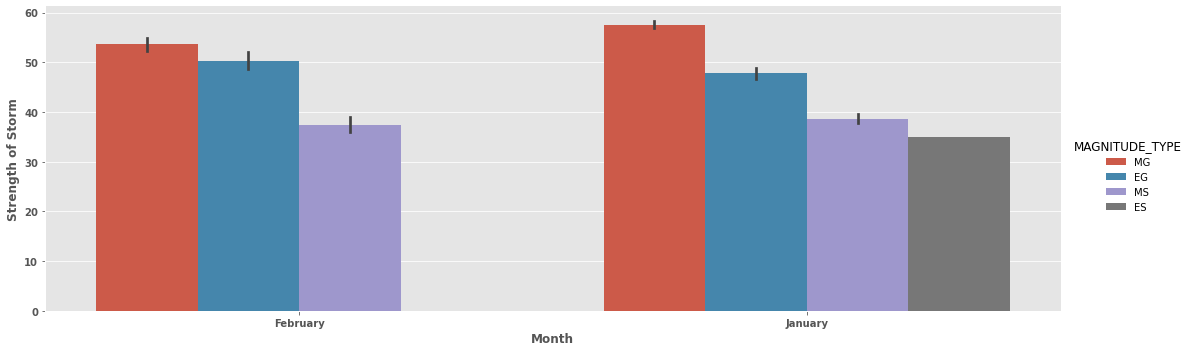

In [16]:
sns.catplot('MONTH_NAME', 'MAGNITUDE', hue='MAGNITUDE_TYPE', data=df,kind='bar', aspect=3)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

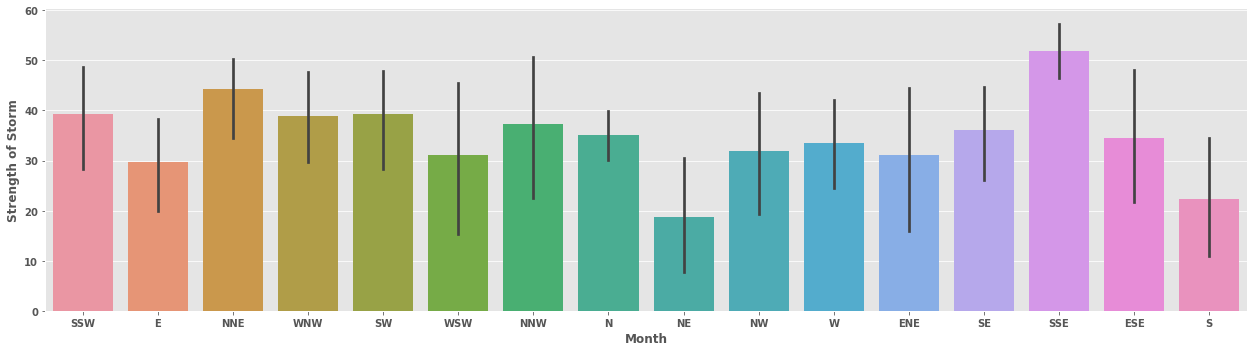

In [17]:
sns.catplot('BEGIN_AZIMUTH', 'MAGNITUDE', data=df,kind='bar', aspect=3.5)
plt.ylabel('Strength of Storm', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

# Date and time analysis

In [18]:
df['BEGIN_DATE_TIME'] = pd.to_datetime(df['BEGIN_DATE_TIME'])
ts = df.set_index(df['BEGIN_DATE_TIME'])
ts['begin_hour'] = ts['BEGIN_DATE_TIME'].dt.hour
early_hours = ts[ts['begin_hour'] < 9]
late_hours = ts[ts['begin_hour'] > 17]

In [19]:
len(ts)

10709

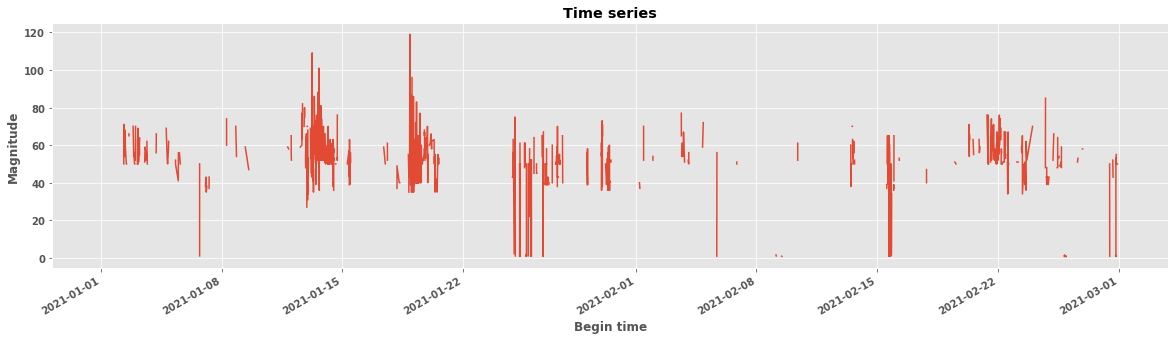

In [20]:
plt.figure(figsize=(20,5))
ts['MAGNITUDE'].plot()
plt.title('Time series', fontweight='bold')
plt.ylabel('Magnitude', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin time", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

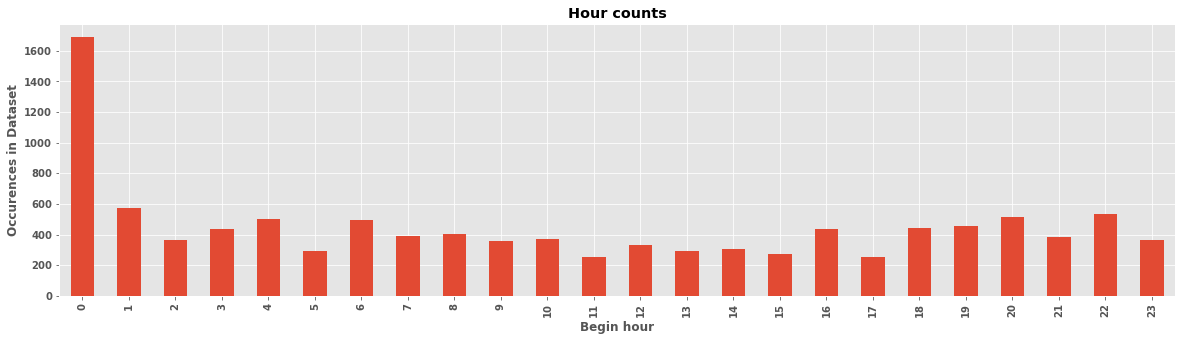

In [21]:
plt.figure(figsize=(20,5))
ts.groupby('begin_hour')['begin_hour'].count().plot(kind='bar')
plt.title('Hour counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Begin hour", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

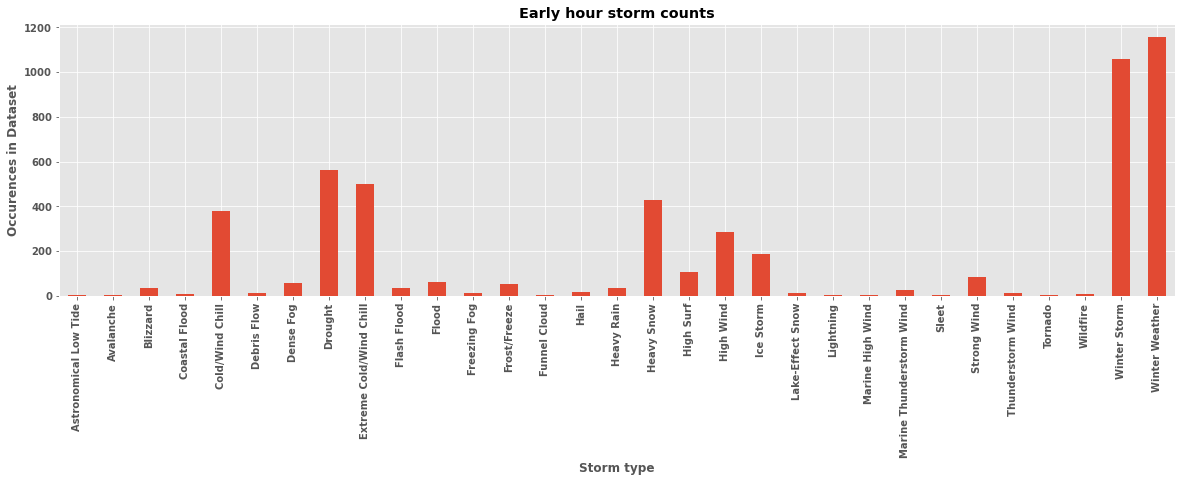

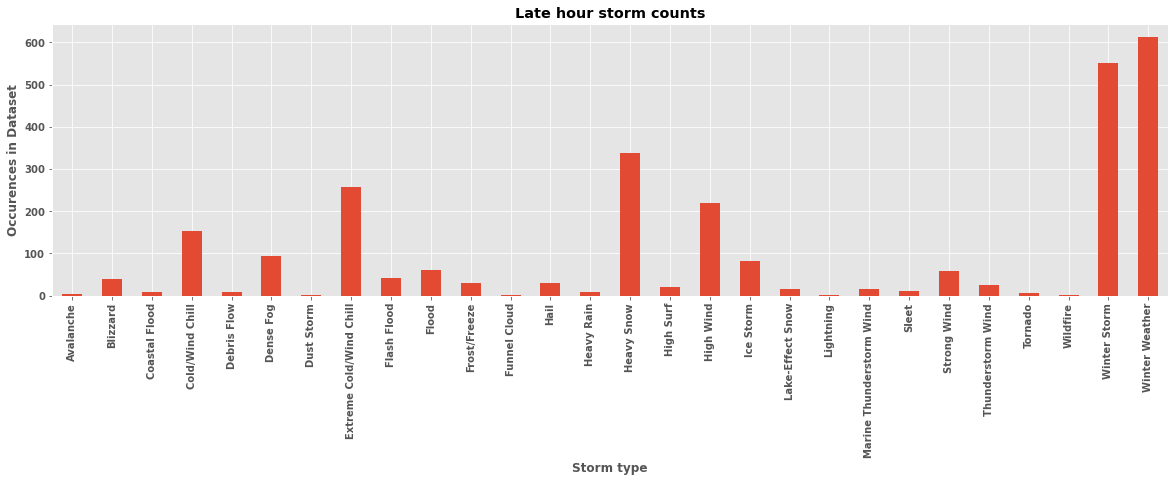

In [22]:
plt.figure(figsize=(20,5))
early_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Early hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.figure(figsize=(20,5))
late_hours.groupby('EVENT_TYPE')['EVENT_TYPE'].count().plot(kind='bar')
plt.title('Late hour storm counts', fontweight='bold')
plt.ylabel('Occurences in Dataset', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Storm type", fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [23]:
df['EVENT_TYPE'].value_counts()

Winter Weather              2727
Winter Storm                2087
Heavy Snow                  1111
High Wind                    946
Extreme Cold/Wind Chill      784
Cold/Wind Chill              566
Drought                      562
Ice Storm                    322
Flood                        240
Strong Wind                  181
Dense Fog                    154
High Surf                    133
Thunderstorm Wind            124
Blizzard                     107
Flash Flood                  106
Frost/Freeze                  85
Hail                          80
Marine Thunderstorm Wind      73
Heavy Rain                    63
Coastal Flood                 43
Lake-Effect Snow              40
Debris Flow                   37
Tornado                       28
Avalanche                     20
Wildfire                      14
Dust Storm                    14
Astronomical Low Tide         13
Sleet                         13
Freezing Fog                  11
Lightning                      7
Funnel Clo